In [93]:
from PIL import Image, GifImagePlugin, ImageOps
from math import pi, cos, sin, floor

In [94]:
class Biometrics:
    # position data
    head_pos = (48, 6)
    bowtie_pos = (53,39)
    l_elbow_pos = (10, 28)
    r_elbow_pos = (79, 28)
    arm_len = 25

    # arm angles (in radians) at each frame
    arm_rads = [
        (pi * 2.9/2, pi * 3/2),
        (pi * 2.9/2, pi * 3/2),
        (pi * 2.9/2, pi * 3/2),
        (0, 0),
        (pi/2.8, pi/2.8),
        (pi - pi/2.8, pi - pi/2.8),
        (pi/0.9, pi),
        (pi * 2.9/2, pi * 3/2),
        (pi * 3.2/2, pi * 3.2/2),
        (0.2, 0.4),
        (pi/2.8, pi/2.6),
        (pi/2, pi/2),
        (pi, pi-0.2),
        (4, 4.2),
        (4.5, 4.6),
        (5.7, 5.7),
        (0.9, 1.1),
        (1.6, 1.7),
        (3.05, 2.8)
    ]

In [98]:
# Loads the cymbal monkey stem images
class Bodyparts:
    def __init__(self):
        self.head = Image.open('head.png')
        self.head.thumbnail((32, 32), Image.ANTIALIAS)

        self.bowtie = Image.open('bowtie.png').convert('RGBA')
        self.bowtie.thumbnail((10, 7), Image.ANTIALIAS)

        self.l_cymbal = Image.open('cymbal.png')
        self.l_cymbal.thumbnail((25, 25), Image.ANTIALIAS)
        
        self.r_cymbal = ImageOps.mirror(l_cymbal)
    
    def get_all(self):
        return self.head, self.bowtie, self.l_cymbal, self.r_cymbal
        
class MonkeyMorph:
    def __init__(self):
        self.bodyparts = Bodyparts()
        self.biometrics = Biometrics()
    
    # Extract the array of frames from the monkey gif.
    def get_frames(self):
        gif = Image.open('monkey.gif')
        frames = []
        for n_frame in range(gif.n_frames):
            gif.seek(n_frame)
            dur = gif.info['duration']
            frame = Image.new('RGBA', gif.size)
            frame.paste(gif, (0, 0), gif.convert('RGBA'))
            frames.append(frame)
        return frames

    # Computes the positions of the left and right hands from the respective arm angles.
    def hand_positions(self, l_rad, r_rad):
        lx, ly = self.biometrics.l_elbow_pos
        rx, ry = self.biometrics.r_elbow_pos
        
        l_pos = (lx + round(arm_len * cos(l_rad + pi)), ly + round(arm_len * sin(l_rad + pi)))
        r_pos = (rx + round(arm_len * cos(r_rad + pi)), ly + round(arm_len * sin(r_rad + pi)))
        
        return l_pos, r_pos

    # Transform a single `frame` with the given left and arm angles.
    def cymbalify_frame(self, frame, l_rad, r_rad):
        head, bowtie, l_cymbal, r_cymbal = self.bodyparts.get_all()
        
        frame.paste(head, head_pos, head)
        frame.paste(bowtie, bowtie_pos, bowtie)

        lh, rh = self.hand_positions(l_rad, r_rad)
        frame.paste(l_cymbal, lh, l_cymbal)
        frame.paste(r_cymbal, rh, r_cymbal)

        return frame
    
    def write_frames(self, frames, out_path, frame_duration):
        # `loop=0` makes the gif loop forever.
        frames[0].save(out_path,
                   save_all=True, append_images=frames[1:], 
                   optimize=True, duration=frame_duration, loop=0)

    def main(self):
        bodyparts = self.bodyparts
        biometrics = self.biometrics
        frames = self.get_frames()
        
        result_frames = []
        for arm_rad, frame in zip(biometrics.arm_rads, frames):
            l_rad, r_rad = arm_rad
            result_frames.append(self.cymbalify_frame(frame, l_rad, r_rad))
            
        self.write_frames(result_frames, out_path='cymbal-monkey.gif', frame_duration=20)

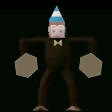

In [99]:
frame = get_frames()[1]
bp = Bodyparts()
cymbalify_frame(frame, bp, arm_rads[0][0], arm_rads[0][1])

In [100]:
cymbalify()